In [1]:
import medleydb as mdb
from medleydb.mix import VOCALS
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def get_experiment_trackids():
    mtracks = mdb.load_all_multitracks(dataset_version=['V1', 'V2', 'EXTRA', 'BACH10'])
    all_trackids = []
    for mtrack in mtracks:
        if mtrack.has_bleed:
            continue
        has_pitch_annot = [
            s.pitch_pyin_path is not None and os.path.exists(s.pitch_pyin_path)
            for s in mtrack.stems.values()
        ]
        if any(has_pitch_annot):
            all_trackids.append(mtrack.track_id)
    return all_trackids

In [3]:
all_trackids = get_experiment_trackids()

In [18]:
clar_files = list(mdb.get_files_for_instrument('clarinet', mdb.load_multitracks(all_trackids)))

In [19]:
len(clar_files)

18

In [36]:
def frequencies_pyin_est():
    instruments = []
    components = []
    genre = []
    for trackid in all_trackids:
        mtrack = mdb.MultiTrack(trackid)
        for stem in mtrack.stems.values():
            if not os.path.exists(stem.pitch_pyin_path):
                continue
            mono_inst = [i for i in stem.instrument if mdb.multitrack.get_f0_type(i) == 'm']
            if len(mono_inst) > 0:
                instruments.append(mono_inst[0])
                components.append(stem.component)
                genre.append(mtrack.genre)
            else:
                print("{} Stem {}".format(mtrack.track_id, stem.stem_idx))
    return instruments, components, genre

In [37]:
def frequencies_gt_est():
    instruments = []
    components = []
    genre = []
    for mtrack in mdb.load_all_multitracks(dataset_version=['V1']):
        for stem in mtrack.stems.values():
            if not os.path.exists(stem.pitch_path):
                continue

            if len(stem.instrument) > 1:
                mono_inst = [
                    i for i in stem.instrument if mdb.multitrack.get_f0_type(i) == 'm'
                ]
                if len(mono_inst) > 0:
                    instruments.append(mono_inst[0])
                    
                else:
                    instruments.append(stem.instrument[0])
            else:
                instruments.append(stem.instrument[0])
            
            genre.append(mtrack.genre)
            
            if stem.component != 'melody':
                print(
                    "{} Stem {} instrument {}".format(
                        mtrack.track_id, stem.stem_idx, stem.instrument[0]
                    )
                )
            components.append(stem.component)

    return instruments, components, genre

In [38]:
print('PYIN ESTIMATES')
instruments_est, components_est, genre_est = frequencies_pyin_est()
print('GROUND TRUTH')
instruments_gt, components_gt, genre_gt = frequencies_gt_est()

PYIN ESTIMATES
GROUND TRUTH


In [39]:
len(instruments_est)

529

In [40]:
df_est = pd.DataFrame(zip(instruments_est, components_est, genre_est), columns=['instrument', 'component', 'genre'])
df_gt = pd.DataFrame(zip(instruments_gt, components_gt, genre_gt), columns=['instrument', 'component', 'genre'])

In [41]:
df_est.describe()

,instrument,component,genre
count,529,529,529
unique,28,3,9
top,electric bass,melody,Rock
freq,162,242,175


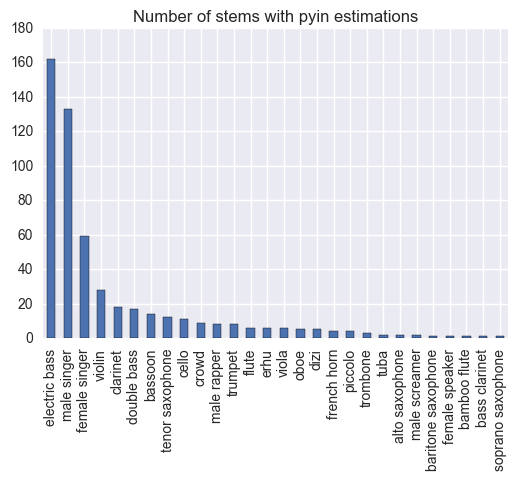

In [42]:
df_est.instrument.value_counts().plot(
    kind='bar', title='Number of stems with pyin estimations'
)

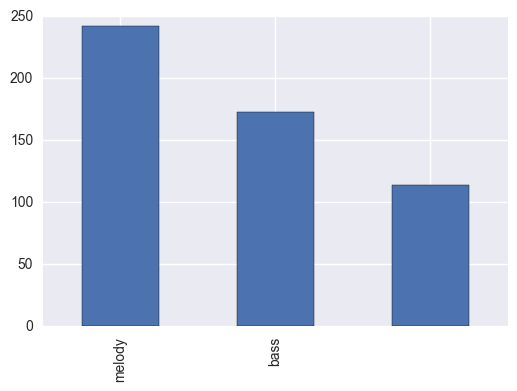

In [43]:
df_est.component.value_counts().plot(kind='bar')

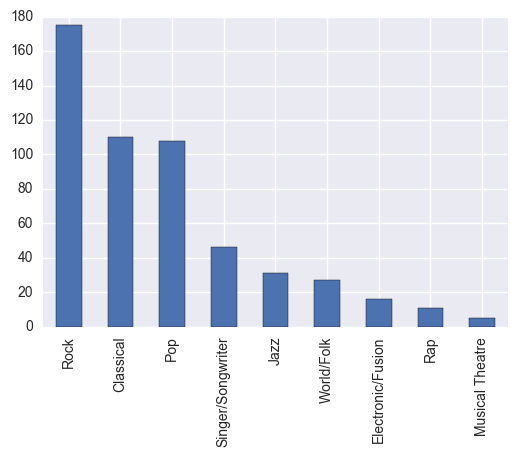

In [44]:
df_est.genre.value_counts().plot(kind='bar')

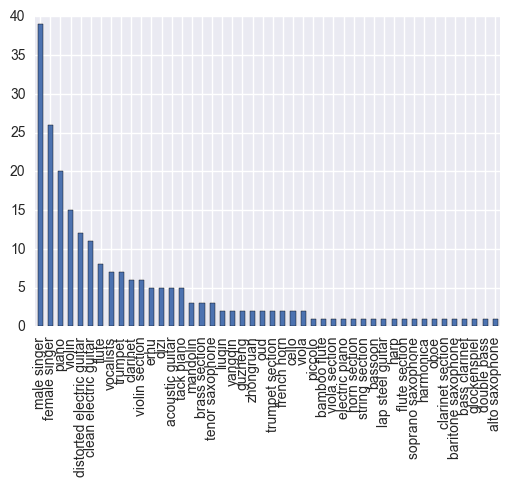

In [45]:
df_gt.instrument.value_counts().plot(kind='bar')

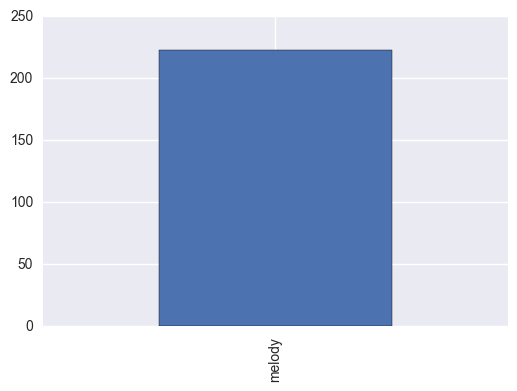

In [47]:
df_gt.component.value_counts().plot(kind='bar')

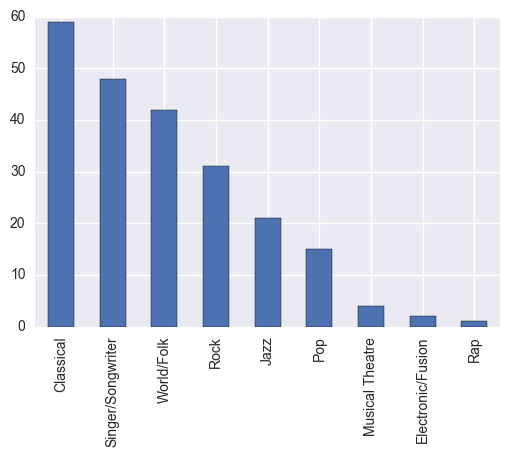

In [48]:
df_gt.genre.value_counts().plot(kind='bar')